In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
 # Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | nantucket
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | skegness
Processing Record 8 of Set 1 | helong
Processing Record 9 of Set 1 | raga
Processing Record 10 of Set 1 | homer
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | chapais
Processing Record 22 of Set 1 | saldanha
Processing Record 23 of Se

Processing Record 39 of Set 4 | maragogi
Processing Record 40 of Set 4 | norden
Processing Record 41 of Set 4 | northam
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | chateaudun
Processing Record 44 of Set 4 | zlobin
Processing Record 45 of Set 4 | stafford
Processing Record 46 of Set 4 | itaituba
Processing Record 47 of Set 4 | hobart
Processing Record 48 of Set 4 | faridpur
Processing Record 49 of Set 4 | kapoeta
Processing Record 50 of Set 4 | krasnoselkup
Processing Record 1 of Set 5 | puerto ayora
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | makung
City not found. Skipping...
Processing Record 5 of Set 5 | tuatapere
Processing Record 6 of Set 5 | volksrust
Processing Record 7 of Set 5 | olinda
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | san policarpo
Processing Record 10 of Set 5 | pauini
Processing Record 11 of Set 5 | tsihombe
City not

Processing Record 30 of Set 8 | wukari
Processing Record 31 of Set 8 | ciudad bolivar
Processing Record 32 of Set 8 | berlevag
Processing Record 33 of Set 8 | teknaf
Processing Record 34 of Set 8 | colares
Processing Record 35 of Set 8 | cruden bay
City not found. Skipping...
Processing Record 36 of Set 8 | altay
Processing Record 37 of Set 8 | biltine
Processing Record 38 of Set 8 | dymer
Processing Record 39 of Set 8 | zhigansk
Processing Record 40 of Set 8 | fethiye
Processing Record 41 of Set 8 | inverness
Processing Record 42 of Set 8 | zlitan
Processing Record 43 of Set 8 | vila praia de ancora
Processing Record 44 of Set 8 | victoria point
Processing Record 45 of Set 8 | chara
Processing Record 46 of Set 8 | yashkino
Processing Record 47 of Set 8 | pahrump
Processing Record 48 of Set 8 | aykhal
Processing Record 49 of Set 8 | kysyl-syr
Processing Record 50 of Set 8 | parabel
Processing Record 1 of Set 9 | victor harbor
Processing Record 2 of Set 9 | gold coast
Processing Record 

Processing Record 15 of Set 12 | henties bay
Processing Record 16 of Set 12 | vila franca do campo
Processing Record 17 of Set 12 | panama city
Processing Record 18 of Set 12 | bolshaya chernigovka
City not found. Skipping...
Processing Record 19 of Set 12 | pemba
Processing Record 20 of Set 12 | dzerzhinskoye
Processing Record 21 of Set 12 | morant bay
Processing Record 22 of Set 12 | evensk
Processing Record 23 of Set 12 | urucara
Processing Record 24 of Set 12 | ust-tsilma
Processing Record 25 of Set 12 | solnechnyy
Processing Record 26 of Set 12 | inongo
Processing Record 27 of Set 12 | iracoubo
Processing Record 28 of Set 12 | xam nua
Processing Record 29 of Set 12 | utiroa
City not found. Skipping...
Processing Record 30 of Set 12 | villany
Processing Record 31 of Set 12 | mahon
Processing Record 32 of Set 12 | bambanglipuro
Processing Record 33 of Set 12 | hobyo
Processing Record 34 of Set 12 | severnyy
Processing Record 35 of Set 12 | kayerkan
Processing Record 36 of Set 12 | s

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Cloudiness", "Wind Speed"]
df = city_data_df.head(10)[new_column_order]

df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-06-22 06:06:34,-34.4187,19.2345,56.80,99,7.14
1,Pisco,PE,2022-06-22 06:06:34,-13.7000,-76.2167,59.05,100,5.75
2,Nantucket,US,2022-06-22 06:06:35,41.2835,-70.0995,62.71,0,10.36
3,Qaanaaq,GL,2022-06-22 06:06:35,77.4840,-69.3632,33.55,94,5.70
4,Kapaa,US,2022-06-22 06:06:36,22.0752,-159.3190,80.58,20,16.11
5,Bengkulu,ID,2022-06-22 06:06:36,-3.8004,102.2655,83.79,82,5.66
6,Skegness,GB,2022-06-22 06:06:36,53.1436,0.3363,62.58,15,1.10
7,Helong,CN,2022-06-22 06:06:37,42.5397,128.9972,69.98,100,2.68
8,Raga,SS,2022-06-22 06:06:37,8.4596,25.6780,74.91,9,4.43
9,Homer,US,2022-06-22 06:06:38,59.6425,-151.5483,60.67,0,11.01


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

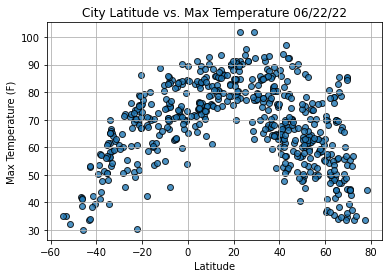

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

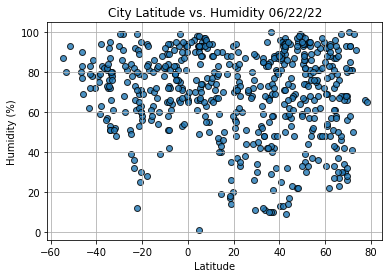

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

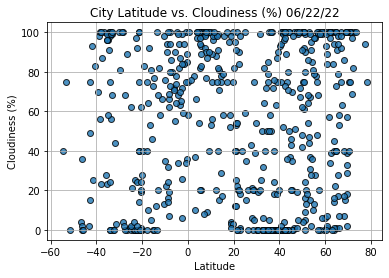

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

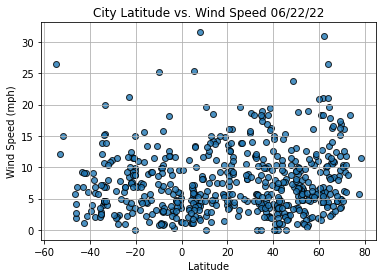

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()